In [2]:
from ase.io import read
from ase.visualize import view
from ase.visualize.plot import plot_atoms
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

# Visualize one structure

In [9]:
path_xyz = 'Round2/intial_structures/trajectories_e_slab'
os.listdir(path_xyz)[:10]

['00a7eb9c-b86c-4a81-a566-4d418becc90f_e_slab.xyz',
 '02441ae1-6eac-47b3-9a73-3aef07fb3fb2_e_slab.xyz',
 '09b03506-e076-49a0-86f9-29d231772061_e_slab.xyz',
 '0e1c69bb-485f-406e-9410-8d2b39af3b37_e_slab.xyz',
 '0eb29646-1565-440b-aa0d-2a4733a8e847_e_slab.xyz',
 '107e8fe7-09f3-4d92-90e9-f9ea0d93a186_e_slab.xyz',
 '11fe35b7-fc14-437f-96ba-7901da6ef5a1_e_slab.xyz',
 '12e7deb0-38ec-4399-b9ce-ff83195961a7_e_slab.xyz',
 '1462a437-0046-4b6b-8e70-e2d3d9c8ce47_e_slab.xyz',
 '1558e0cd-b099-49e5-b140-d5c1b0da8cd8_e_slab.xyz']

In [10]:
xyz = '00a7eb9c-b86c-4a81-a566-4d418becc90f_e_slab.xyz'
at1 = read( os.path.join(path_xyz, xyz) )
view(at1,viewer='x3d')

In [14]:
np.min( at1.get_positions()[:,2] )

11.58672333

# Read structures Round 1

In [2]:
# Starting XYZ
jobdir = 'trajectories_e_tot/'
jobdir = [ os.path.join(jobdir,j) for j in os.listdir(jobdir) ]

keys = list(set([ j.split('/')[-1].split('__')[0] for j in jobdir ]))
struct_start = { k:[j for j in jobdir if k in j] for k in keys }
print( len(keys) )

151


In [3]:
# Optimized XYZ
jobdir = 'trajectories_e_tot_optimized/'
jobdir = [ os.path.join(jobdir,j) for j in os.listdir(jobdir) ]

keys = list(set([ j.split('/')[-1].split('__')[0] for j in jobdir ]))
struct_final = { k:[j for j in jobdir if k in j] for k in keys }
print( len(keys) )

151


In [4]:
xyzs = struct_start[ keys[0] ]
atoms = [ read(x) for x in xyzs ]

atoms_z = [ at.get_positions()[:,2] for at in atoms ]
atoms_z_lim = [ [np.amin(z), np.amax(z)] for z in atoms_z ]
atoms_z_lim = ( np.amin(atoms_z_lim)-2, np.amax(atoms_z_lim)+2 )
print( atoms_z_lim )
xyzs
#view(at,viewer='x3d')

(13.43801689, 31.99393272)


['trajectories_e_tot/9e36d474-d5af-46d7-aca7-0f90c3dfaa1d__CH2OH.xyz',
 'trajectories_e_tot/9e36d474-d5af-46d7-aca7-0f90c3dfaa1d__CHO.xyz',
 'trajectories_e_tot/9e36d474-d5af-46d7-aca7-0f90c3dfaa1d__CHOH.xyz',
 'trajectories_e_tot/9e36d474-d5af-46d7-aca7-0f90c3dfaa1d__CO.xyz',
 'trajectories_e_tot/9e36d474-d5af-46d7-aca7-0f90c3dfaa1d__COH.xyz',
 'trajectories_e_tot/9e36d474-d5af-46d7-aca7-0f90c3dfaa1d__OHCH3.xyz']

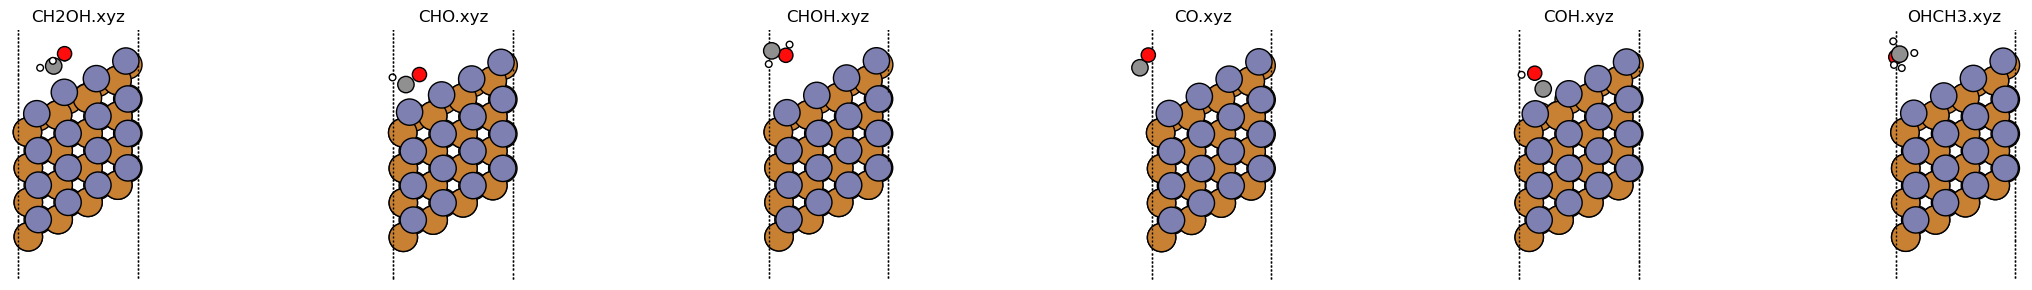

In [5]:
fig, axs = plt.subplots(1, len(xyzs), figsize=(4*len(xyzs), 3), tight_layout=True)

rotate_angles = '-90x,0y,0z'

for n,x in enumerate(xyzs):
    plot_atoms(atoms[n], axs[n], radii=0.8, rotation=(rotate_angles))
    #axs[n].set_xlim(0, 6)
    axs[n].set_ylim(atoms_z_lim[0],atoms_z_lim[1])
    axs[n].set_axis_off()
    axs[n].set_title(x.split('_')[-1])
    #axs[n].set_xlabel("X-axis")#, [$\mathrm{\AA}$]")
    #axs[n].set_ylabel("Z-axis")#, [$\mathrm{\AA}$]")
#fig.savefig("Snapshot_tot.png", dpi=800)
plt.show()

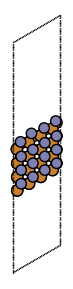

In [6]:
fig, axs = plt.subplots(1, 1, figsize=(4,3), tight_layout=True)
at = read(xyzs[0])
del at[[a.index for a in at if a.symbol not in ['Cu','Zn']]]

plot_atoms(at, axs, radii=0.8, rotation=('-90x,0y,0z'))
axs.set_axis_off()
#axs.set_xlabel("X-axis")#, [$\mathrm{\AA}$]")
#axs.set_ylabel("Z-axis")#, [$\mathrm{\AA}$]")
fig.savefig("Snapshot_slab.png", dpi=800)
plt.show()

# Read energies

In [3]:
path_xyz = 'Round2/dft_structures/'

tot  = pd.read_csv( os.path.join(path_xyz,'energy_tot.csv'), index_col=0)
slab = pd.read_csv( os.path.join(path_xyz,'energy_slab.csv') )#, index_col=0)
display( tot, slab )

,energy
name,
00a7eb9c-b86c-4a81-a566-4d418becc90f__CH2_O,-262.206025
00a7eb9c-b86c-4a81-a566-4d418becc90f__CHO,-258.162458
00a7eb9c-b86c-4a81-a566-4d418becc90f__CHOH,-261.749292
00a7eb9c-b86c-4a81-a566-4d418becc90f__CH_O,-258.272784
00a7eb9c-b86c-4a81-a566-4d418becc90f__CO,-254.834636
...,...
1462a437-0046-4b6b-8e70-e2d3d9c8ce47__CH2_O,-181.734864
19c8e6c9-0b35-4952-a9c0-787b830cf983__CH2OH,-126.488285
19c8e6c9-0b35-4952-a9c0-787b830cf983__CH2_O,-122.855287


,name,energy
0,02441ae1-6eac-47b3-9a73-3aef07fb3fb2_e_slab,-215.964436
1,09b03506-e076-49a0-86f9-29d231772061_e_slab,-90.952457
2,0e1c69bb-485f-406e-9410-8d2b39af3b37_e_slab,-115.840309
3,0eb29646-1565-440b-aa0d-2a4733a8e847_e_slab,-215.964436
4,107e8fe7-09f3-4d92-90e9-f9ea0d93a186_e_slab,-173.286843
...,...,...
146,4c8b7bd7-3643-4303-af53-c7e99a8fbfb1_e_slab,-115.840309
147,956b294e-e3a3-476c-a419-89f1848ba270_e_slab,-215.964436
148,97c4a50e-4980-495a-92f3-da64fbe408b8_e_slab,-101.037926
149,d80dcb52-70fe-4cd2-b731-706811775ece_e_slab,-173.286843


In [4]:
energy_slab = { k[:-7]:v for k,v in zip(slab['name'],slab['energy']) } 
energy_CO = -14.48438332

In [5]:
labels = sorted( set([ ''.join(m.split('__')[1:]) for m in list( tot.index ) ]) )
print( labels )

for n,l in enumerate(labels):
    print(n,l)

['CH2OH', 'CH2_O', 'CHO', 'CHOH', 'CH_O', 'CO', 'COH', 'H', 'OCH3', 'OHCH3']
0 CH2OH
1 CH2_O
2 CHO
3 CHOH
4 CH_O
5 CO
6 COH
7 H
8 OCH3
9 OHCH3


In [6]:
pathway_index = [
    [5, 6, 3, 0, 9],
    [5, 2, 3, 0, 9],
    [5, 4, 3, 0, 9],
    
    [5, 4, 1, 8, 9],
]

for p in pathway_index:
    #print( [labels[n] for n in p] ) 
    print( ' -> '.join([labels[n].ljust(10,' ') for n in p]) )

CO         -> COH        -> CHOH       -> CH2OH      -> OHCH3     
CO         -> CHO        -> CHOH       -> CH2OH      -> OHCH3     
CO         -> CH_O       -> CHOH       -> CH2OH      -> OHCH3     
CO         -> CH_O       -> CH2_O      -> OCH3       -> OHCH3     


In [8]:
## slab ID is key, value is a list of pathways
all_energy_paths = {}

for k in energy_slab.keys():
    #print( k )
    row_in_tot = [ k+'__'+b for b in labels ]
    energy = np.array( tot.loc[ row_in_tot ] ).flatten()
    
    energy_surface = energy_slab[k]
    energy_H_ad = energy[7]

    # CO binding to surface
    energy_CO_bind = energy[5] - energy_CO - energy_surface
    
    energy_paths = []
    for path in pathway_index:
        reaction_energy = np.diff( energy[path] ) + energy_surface - energy_H_ad
        #print( energy[path]  )
        energy_paths.append( [energy_CO_bind] + list(reaction_energy) )
        
    all_energy_paths[k] = energy_paths
    

In [9]:
all_energy_paths

{'02441ae1-6eac-47b3-9a73-3aef07fb3fb2': [[-0.04704352999999628,
   1.0594618300000036,
   -1.294342290000003,
   -0.9402341200000137,
   -1.0879800699999862],
  [-0.04704352999999628,
   0.16187372000001687,
   -0.3967541800000163,
   -0.9402341200000137,
   -1.0879800699999862],
  [-0.04704352999999628,
   0.18316412000001492,
   -0.4180445800000143,
   -0.9402341200000137,
   -1.0879800699999862],
  [-0.04704352999999628,
   0.18316412000001492,
   -0.9492655500000069,
   -1.4425895699999955,
   -0.054403650000011794]],
 '09b03506-e076-49a0-86f9-29d231772061': [[-0.23787728999998592,
   0.7566057199999818,
   -0.2638821600000085,
   -0.8237053400000036,
   -1.4370744800000068],
  [-0.23787728999998592,
   0.41444632999998987,
   0.07827722999998343,
   -0.8237053400000036,
   -1.4370744800000068],
  [-0.23787728999998592,
   0.4145585499999811,
   0.07816500999999221,
   -0.8237053400000036,
   -1.4370744800000068],
  [-0.23787728999998592,
   0.4145585499999811,
   -0.8340750800000

c90a6743-8837-4e15-84f0-63938da6e564
3
-0.22834925999998745


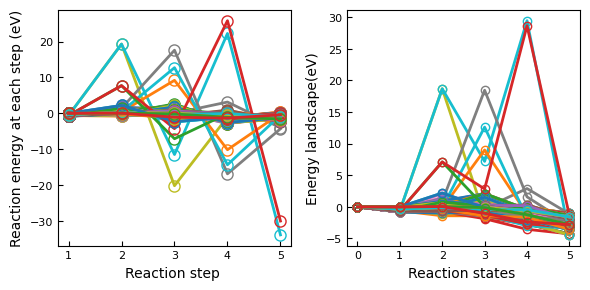

In [48]:
# Check all surfaces
best_surf, best_path_index, highest_energy = '','',1e7

ax_max, ax_min = -1e7,1e7
fig, axs = plt.subplots(1,2,figsize=(3*2,3),tight_layout=True,dpi=100)

for n,(surf,energy_path) in enumerate(all_energy_paths.items()):
    #print(n)
    xdata = list(np.arange( len(energy_path[0]) )+1)
    # The path that are most exothermic: Find the biggest reaction energy in each path, and pick one with the lowest value

    for n,e in enumerate(energy_path):
        # Reaction energy per step
        axs[0].plot(xdata, e, lw=2, ls='-', marker='o', ms=8, markerfacecolor='none')# color=colors[n], label=labels[n], )
        #ax_max = np.max( [ ax_max, np.max(e) ] )
        #ax_min = np.min( [ ax_min, np.min(e) ] )
    
        # Find the highest reaction E
        if np.max(e) < highest_energy:
            highest_energy = np.max(e)
            best_path_index = n
            best_surf = surf
            
        # Energy landscape
        axs[1].plot( [0]+xdata, [0]+list(np.cumsum(e)), lw=2, ls='-', marker='o', ms=6, markerfacecolor='none')# color=colors[n], label=labels[n], )
    
for n in range(2):
    axs[n].tick_params(direction='in',labelsize=8)
    #axs[n].set_ylim((ax_min-0.1,ax_max+0.1))
    #axs[n].set_xlim(left=0)

axs[0].set_xlabel('Reaction step ',fontsize=10) ## input X name
axs[1].set_xlabel('Reaction states ',fontsize=10) ## input X name
axs[0].set_ylabel('Reaction energy at each step (eV)',fontsize=10) ## input Y name
axs[1].set_ylabel('Energy landscape(eV)',fontsize=10) ## input Y name

print(best_surf)
print( best_path_index )
print( highest_energy )
#print( ' -> '.join([labels[n].ljust(10,' ') for n in pathway_index[best_path_index] ]) )
#print( ' -> '.join([ str(n).ljust(10,' ') for n in pathway_index[best_path_index] ]) )
fig.savefig("All_surf_pathway.png", dpi=400)
plt.show()

CO         -> CH_O       -> CH2_O      -> OCH3       -> OHCH3     
5          -> 4          -> 1          -> 8          -> 9         


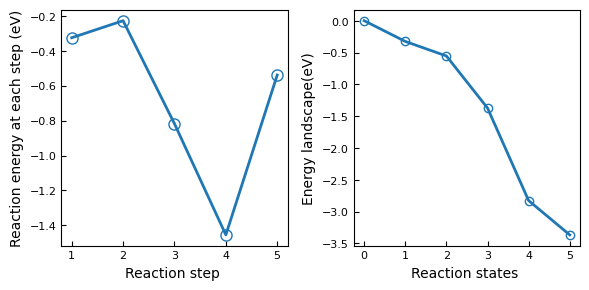

In [49]:
# Check individual surface
surf_input = 'c90a6743-8837-4e15-84f0-63938da6e564'
path_input = 3

energy_path = all_energy_paths[surf_input][path_input]

xdata = list(np.arange(len(energy_path))+1)
ax_max, ax_min = -1e7,1e7

fig, axs = plt.subplots(1,2,figsize=(3*2,3),tight_layout=True,dpi=100)

axs[0].plot(xdata, energy_path, lw=2, ls='-', marker='o', ms=8, markerfacecolor='none')# color=colors[n], label=labels[n], )
#ax_max = np.max( [ ax_max, np.max(e) ] )
#ax_min = np.min( [ ax_min, np.min(e) ] )
    
# Energy landscape
axs[1].plot( [0]+xdata, [0]+list(np.cumsum(energy_path)), lw=2, ls='-', marker='o', ms=6, markerfacecolor='none')# color=colors[n], label=labels[n], )
    
for n in range(2):
    axs[n].tick_params(direction='in',labelsize=8)
    #axs[n].set_ylim((ax_min-0.1,ax_max+0.1))
    #axs[n].set_xlim(left=0)
axs[0].set_xlabel('Reaction step ',fontsize=10) ## input X name
axs[1].set_xlabel('Reaction states ',fontsize=10) ## input X name
axs[0].set_ylabel('Reaction energy at each step (eV)',fontsize=10) ## input Y name
axs[1].set_ylabel('Energy landscape(eV)',fontsize=10) ## input Y name

print( ' -> '.join([labels[n].ljust(10,' ') for n in pathway_index[path_input] ]) )
print( ' -> '.join([ str(n).ljust(10,' ') for n in pathway_index[path_input] ]) )
fig.savefig("Best_surf_pathway.png", dpi=400)
plt.show()

In [44]:
track_structure = [ surf_input+'__'+labels[n] for n in pathway_index[path_input] ]
print(surf_input)
track_structure


c90a6743-8837-4e15-84f0-63938da6e564


['c90a6743-8837-4e15-84f0-63938da6e564__CO',
 'c90a6743-8837-4e15-84f0-63938da6e564__CH_O',
 'c90a6743-8837-4e15-84f0-63938da6e564__CH2_O',
 'c90a6743-8837-4e15-84f0-63938da6e564__OCH3',
 'c90a6743-8837-4e15-84f0-63938da6e564__OHCH3']

# Visualize geometry

In [27]:
# Slab surface
jobdir = 'Round2/dft_structures/trajectories_e_slab/'
jobdir = [ os.path.join(jobdir,j) for j in os.listdir(jobdir) if '.xyz' in j ]
slab_start = {j.split('/')[-1].split('_')[0]:j for j in jobdir}

jobdir = 'Round2/dft_structures//'
jobdir = [ os.path.join(jobdir,j) for j in os.listdir(jobdir) if '.xyz' in j ]
slab_final =  {j.split('/')[-1].split('_')[0]:j for j in jobdir}

jobdir = 'Round2/dft_structures/trajectories_e_tot/'
jobdir = [ os.path.join(jobdir,j) for j in os.listdir(jobdir) if '.xyz' in j ]
tot_start =  {j.split('/')[-1][:-4]:j for j in jobdir}

jobdir = 'Round2/dft_structures/optimized_tot/'
jobdir = [ os.path.join(jobdir,j) for j in os.listdir(jobdir) if 'CONTCAR' in j ]
tot_final =  {j.split('/')[-1][8:-5]:j for j in jobdir}


In [15]:
atoms = [ read( tot_start[x] ) for x in track_structure ]

atoms_z = [ at.get_positions()[:,2] for at in atoms ]
atoms_z_lim = [ [np.amin(z), np.amax(z)] for z in atoms_z ]
atoms_z_lim = ( np.amin(atoms_z_lim)-2, np.amax(atoms_z_lim)+2 )
print( atoms_z_lim )
#xyzs
#view(at,viewer='x3d')

(11.0, 26.7217617)


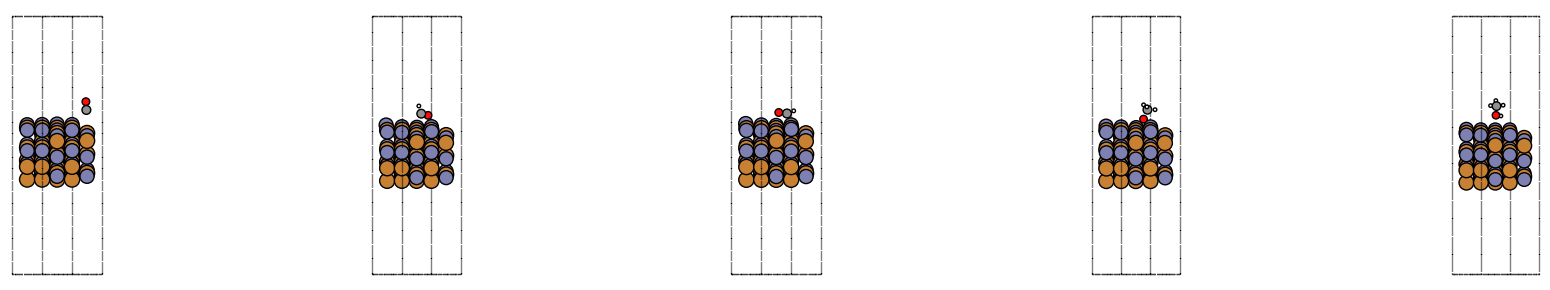

In [16]:
fig, axs = plt.subplots(1, len(atoms), figsize=(4*len(atoms), 3), tight_layout=True)

rotate_angles = '-90x,0y,0z'

for n,x in enumerate(atoms):
    plot_atoms(atoms[n], axs[n], radii=0.8, rotation=(rotate_angles))
    #axs[n].set_xlim(0, 6)
    #axs[n].set_ylim(atoms_z_lim[0],atoms_z_lim[1])
    axs[n].set_axis_off()
    #axs[n].set_title(x.split('/')[-1].split('_')[1])
    #axs[n].set_xlabel("X-axis")#, [$\mathrm{\AA}$]")
    #axs[n].set_ylabel("Z-axis")#, [$\mathrm{\AA}$]")
#fig.savefig("Snapshot_tot.png", dpi=800)
plt.show()

In [46]:
def visualize_struct(key_names, struct_start=None, struct_final=None, rotate_angles='-90x,-0y,0z', savefig_path=None):
    
    fig, axs = plt.subplots(2, len(key_names), figsize=(3*len(key_names), 3*2), tight_layout=True)
    
    # The starting CONTCAR
    if struct_start is not None:
        atoms = [ read( struct_start[k] ) for k in key_names ]
        boxes = [ at.get_cell() for at in atoms ]

        atoms_z = [ at.get_positions()[:,2] for at in atoms ]
        atoms_z_lim = [ [np.amin(z), np.amax(z)] for z in atoms_z ]
        atoms_z_lim = ( np.amin(atoms_z_lim)-2, np.amax(atoms_z_lim)+2 )

        for n,k in enumerate(key_names):
            plot_atoms(atoms[n], axs[0][n], radii=0.8, rotation=(rotate_angles))
            #axs[n].set_xlim(0, 6)
            axs[0][n].set_ylim(atoms_z_lim[0],atoms_z_lim[1])
            axs[0][n].set_axis_off()
            #axs[0][n].set_title(x.split('_')[-1])
            #axs[n].set_xlabel("X-axis")#, [$\mathrm{\AA}$]")
            #axs[n].set_ylabel("Z-axis")#, [$\mathrm{\AA}$]")
    
    # The optimized CONTCAR
    if struct_final is not None:
        atoms = [ read( struct_final[k] ) for k in key_names ]
        boxes = [ at.get_cell() for at in atoms ]  
    
        atoms_z = [ at.get_positions()[:,2] for at in atoms ]
        atoms_z_lim = [ [np.amin(z), np.amax(z)] for z in atoms_z ]
        atoms_z_lim = ( np.amin(atoms_z_lim)-2, np.amax(atoms_z_lim)+2 )     
        
        for n,k in enumerate(key_names):
            plot_atoms(atoms[n], axs[1][n], radii=0.8, rotation=(rotate_angles))
            axs[1][n].set_ylim(atoms_z_lim[0],atoms_z_lim[1])
            axs[1][n].set_axis_off()
            #axs[1][n].set_title(x.split('_')[-1])
        
    if savefig_path is not None:
        #savefig_path = os.path.join(savefig_path, f"Snapshot_{key_name}.png")
        fig.savefig(savefig_path, dpi=400)
    plt.show()
    plt.close('all')

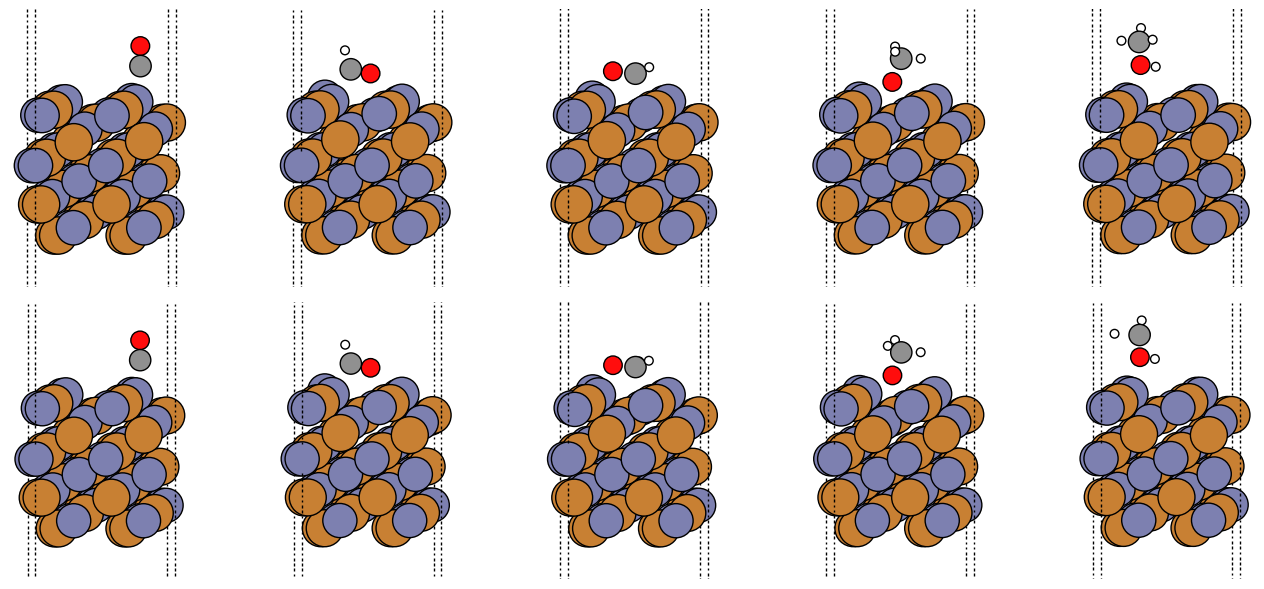

In [47]:
visualize_struct( track_structure, struct_start=tot_start, struct_final=tot_final, 
                 rotate_angles='-90x,-15y,0z', savefig_path='Best_surf_snapshot.png')


In [31]:
at1 = read( tot_final['c90a6743-8837-4e15-84f0-63938da6e564__CO'] )

view(at1,viewer='x3d')

# Lookup the ID to index

In [38]:
lookup_table = pd.read_csv('Round2/lookup_ID.csv')##, index_col=0).set_index('Solvent Name')
lookup_table

,symbols,id,llm_answer,bulk,millers,surface,site_placement
0,"['Cu', 'Zn']",ae595ce9-8e53-452f-9201-19e070b024af,NaN,NaN,NaN,NaN,NaN
1,"['Cu', 'Zn']",89954234-50ab-4d49-8182-39c30340aeba,NaN,mp-987,NaN,NaN,NaN
2,"['Cu', 'Zn']",735aa1d2-219e-41ea-8a7f-27daec921a85,NaN,mp-1215401,NaN,NaN,NaN
3,"['Cu', 'Zn']",582665cf-0b74-4b72-9005-d02e29cda004,NaN,mp-1215518,NaN,NaN,NaN
4,"['Cu', 'Zn']",7ab10056-7eee-445a-a368-87a00252d681,NaN,mp-1215529,NaN,NaN,NaN
...,...,...,...,...,...,...,...
183,"['Cu', 'Zn']",d80dcb52-70fe-4cd2-b731-706811775ece,NaN,mp-1215529,"(2, 1, 1)","(0.04141608666666674, True)","(8.99982487824453, 3.5032790547682553, 17.1009..."
184,"['Cu', 'Zn']",e093e583-b15d-413f-a7f3-f7c8214de263,NaN,mp-1215529,"(2, 1, 1)","(0.04141608666666674, True)","(11.603009238840501, 4.874361201700841, 16.863..."
185,"['Cu', 'Zn']",e7d2e48c-eaae-4bff-86ae-ae070d0a59f7,NaN,mp-1215529,"(2, 1, 1)","(0.04141608666666674, True)","(8.17776665910899, 5.559902275167143, 17.33829..."
186,"['Cu', 'Zn']",3dc38086-295a-4763-88fe-f926dfdb865a,NaN,mp-1215529,"(2, 1, 1)","(0.04141608666666674, True)","(7.6982326979465645, 2.817737981301959, 17.219..."


In [40]:
lookup_table[ lookup_table['id'] == surf_input ]

,symbols,id,llm_answer,bulk,millers,surface,site_placement
59,"['Cu', 'Zn']",c90a6743-8837-4e15-84f0-63938da6e564,NaN,mp-987,"(3, 1, 1)","(0.08333333333333359, True)","(4.130286963305922, 0.10377736464987339, 17.17..."


# Time

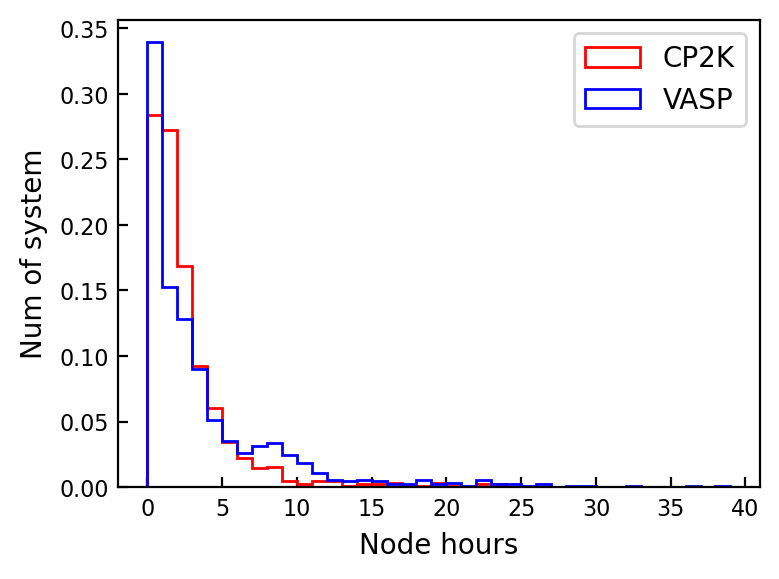

2.680553291942605 3.8806439458689455


In [27]:
with open("time-CP2K.txt",'r') as f1:
    time_cp2k = [ float(l.split()[-1])/3600 for l in f1.readlines() ]
with open("time-VASP.txt",'r') as f1:
    time_vasp = [ float(l.split()[-1])/3600  for l in f1.readlines() ]

fig, ax = plt.subplots(1,1,figsize=(4,3),tight_layout=True,dpi=200)
n_bins = np.arange(40)

ax.hist(time_cp2k, bins=n_bins, fill=False, histtype='step', color='r', density=True, label='CP2K')
ax.hist(time_vasp, bins=n_bins, fill=False, histtype='step', color='b', density=True, label='VASP')

ax.set_xlabel('Node hours',fontsize=10) ## input X name
ax.set_ylabel('Num of system',fontsize=10) ## input Y name
ax.tick_params(direction='in',labelsize=8)

ax.legend()

plt.show()

print( np.mean(time_cp2k), np.mean(time_vasp) )